## BUAN6341.003 Applied Machine Learning Assigment 2 submitted by:          Pingili Lohith

#### In this assignment, the follwing three classification alogorithms are implemented on two datasets:
1. Support Vector Machines (kernals: linear,rbf and sigmoid)
2. Decision trees
3. Boosting(adaboost, weak learner: decision trees)

About the datasets: 
1. First dataset is  Online News Sharing dataset available for download at https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity# .The goal is to predict the number of time an article is shared based on features like number of images, number of videos, day of publication, type of article, referenced article shares etc. By converting the shares variable to a class variable based on median values, we try to classify an article being shared or not  based on the above features. Classification of this kind is interesting as it can help in revenue generation.
2. Second data is Adult dataset available for download at https://archive.ics.uci.edu/ml/datasets/Census+Income, a clean version of which available at https://github.com/udacity/machine-learning/tree/master/projects/finding_donors is used. The goal is to predict whether income exceeds 50K/yr based on census data based on features like sex, education type, years of education, relationship status, race etc. By converting the income variable to a class variable based on >50k/yr and <=50k/yr , we try to classify whether the person's income exceeds $50k/yr. This kind of classification can be of interest to  a non-profit organisation, where organizations survive on donations. Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.

The procedure followed in the implementation of these algorithms is as follows:
1. Converted the decision variable to two classes.
2. Divided the data into train and test sets.
3. Implemented the three algorithms on both datasets.
4. Exeperimented with differernt hyperparameters and compiled a dataframe for each algorithm containing time taken, accuracy score and error for both train and test data with variation in hyperparameters. Plotted error rates vs train data size, error rates vs clock time, evaluation metric vs hyper parameter.
5. Evaluated the best learning algorithm for each dataset based on accuracy score.
6. Further experimentaion is done on the best algorithm with k-fold cross validation to get the best generalized model.
7. Experimentaion with time taken as the number of samples increase in the best model for each dataset is done.

Libraries used: pandas, numpy, scikitlearn, seaborn and matplotlib

## Dataset 1

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df1=pd.read_csv('OnlineNewsPopularity.csv')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
timedelta                         39644 non-null int64
 n_tokens_title                   39644 non-null int64
 n_tokens_content                 39644 non-null int64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null int64
 num_self_hrefs                   39644 non-null int64
 num_imgs                         39644 non-null int64
 num_videos                       39644 non-null int64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null int64
 data_channel_is_lifestyle        39644 non-null int64
 data_channel_is_entertainment    39644 non-null int64
 data_channel_is_bus              39644 non-null int64
 d

In [8]:
shares=df1['shares']
features=df1.drop(['url','timedelta','shares'],axis=1)
features = (features - features.mean()) / (features.max() - features.min()) #Normalisation of data

### Task1 : conversion of shares to two classes based on median value

In [11]:
#Creation of binary variable for shares based on median.
median_shares=np.median(shares)
shares_ind=[]
for share in shares:
    if share>= median_shares:
        shares_ind.append(1)
    else:
        shares_ind.append(0)
shares=pd.DataFrame(shares_ind)

### Task2 : Division of data into test and train sets 

In [12]:
# Splitting data into test and train
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(features, shares, test_size=0.3, random_state=123)

#### Implemetaion of svm with linear kernal

In [7]:
from sklearn import svm
model1=svm.SVC(kernel='linear')
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
s1=accuracy_score(y_test,y_pred1)
s1

C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6356145955944174

#### Experimentaion of svm linear kernal with change in C[0.001,0.01,0.1,1,2,10]: penalty parameter of the error term.

In [8]:
def svm_linear(i):
    import time
    time_start=time.clock()
    model1=svm.SVC(kernel='linear',C=i)
    model1.fit(X_train,y_train)
    y_pred_train=model1.predict(X_train)
    y_pred_test=model1.predict(X_test)
    S_train=accuracy_score(y_train,y_pred_train)
    S_test=accuracy_score(y_test,y_pred_test)
    time_elapsed = (time.clock() - time_start)
    time_taken.append(time_elapsed)
    train_score.append(S_train)
    test_score.append(S_test)
    C.append(i)
    #print(i,time_elapsed,S_train,S_test)

### Dataframe containing hyperparamters, train and test scores, train and test error and computational time for svm linear kernal data set1

In [9]:
c=[0.001,0.01,0.1,1,2,10]
train_score=[]
test_score=[]
time_taken=[]
C=[]
for i in c:
    svm_linear(i)
df1_svm_linear=pd.DataFrame()
df1_svm_linear['C']=C
df1_svm_linear['train_score']=train_score
df1_svm_linear['test_score']=test_score
df1_svm_linear['train_error']=1-df1_svm_linear['train_score']
df1_svm_linear['test_error']=1-df1_svm_linear['test_score']
df1_svm_linear['time']=time_taken
df1_svm_linear

C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,C,train_score,test_score,train_error,test_error,time
0,0.001,0.617802,0.618043,0.382198,0.381957,119.426854
1,0.010,0.613874,0.613839,0.386126,0.386161,109.049058
2,0.100,0.613946,0.613755,0.386054,0.386245,106.385112
3,1.000,0.641225,0.635615,0.358775,0.364385,107.715243
4,2.000,0.648721,0.643854,0.351279,0.356146,111.580419
5,10.000,0.652252,0.649319,0.347748,0.350681,165.088840


#### SVM linear kernal experimentation findings: 
1. The best accuracy score id 0.649 with C=10
2. As C increases there is an increase in accuracy score with maximjum gain from 0.001 to 2 
3. Time taken increases with increase in accuracy
4. Time taken follows a non linear pattern with increase in C


In [114]:
(df1_svm_linear.sort_values(by='test_score',ascending=False)).head(1)

,C,train_score,test_score,train_error,test_error,time
5,10.0,0.652252,0.649319,0.347748,0.350681,165.08884


#### Plots showing variation of c vs time , c vs accuracy , accuracy vs time 

C:\Users\pvloh\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3261: RuntimeWarning: Second argument 'C' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


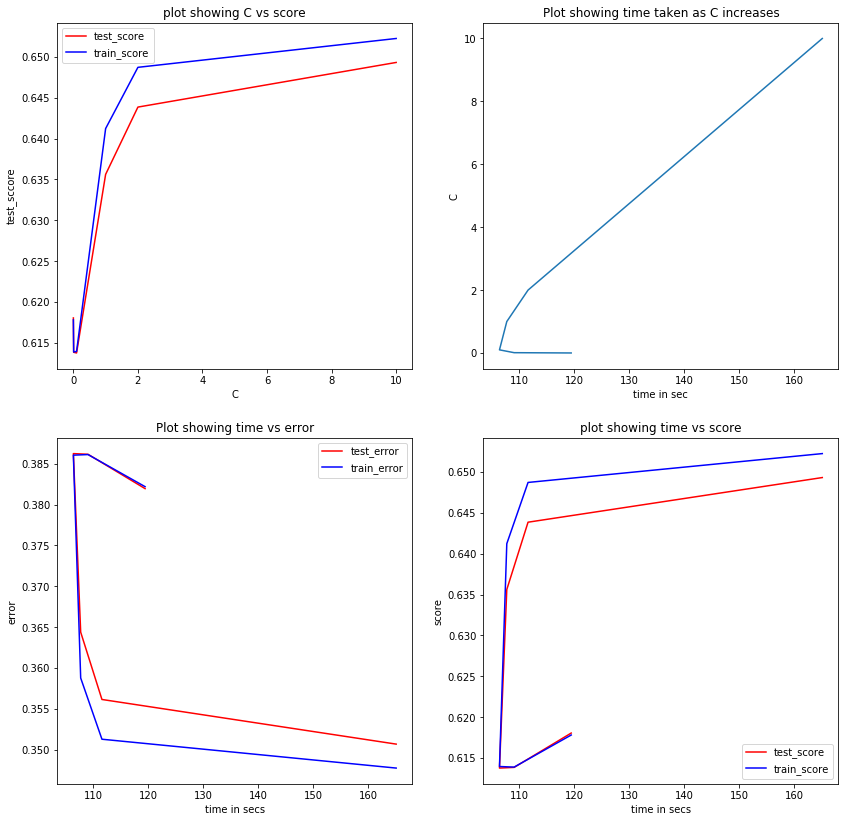

In [152]:
plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
plt.plot('C','test_score',data=df1_svm_linear,color='r')
plt.plot('C','train_score',data=df1_svm_linear,color='b')
plt.xlabel('C')
plt.ylabel('test_sccore')
plt.title('plot showing C vs score')
plt.legend(loc='upper left')
plt.subplot(2,2,2)
plt.plot('time','C',data=df1_svm_linear)
plt.xlabel('time in sec')
plt.ylabel('C')
plt.title('Plot showing time taken as C increases')
plt
plt.subplot(2,2,3)
plt.plot('time','test_error',data=df1_svm_linear,color='r')
plt.plot('time','train_error',data=df1_svm_linear,color='b')
plt.xlabel('time in secs')
plt.ylabel('error')
plt.legend(loc='upper right')
plt.title('Plot showing time vs error')
plt.subplot(2,2,4)
plt.plot('time','test_score',data=df1_svm_linear,color='r')
plt.plot('time','train_score',data=df1_svm_linear,color='b')
plt.xlabel('time in secs')
plt.ylabel('score')
plt.legend(loc='lower right')
plt.title('plot showing time vs score')
plt.show()

#### Implementation and experimentaion of svm rbf kernal with C [0.001,0.01,0.1,1,2,10]: penalty parameter of the error term and gamma [0.001,0.01,0.1,1,2,10]: kernal coefficient 

In [14]:
def svm_rbf(i,j):
    import time
    time_start=time.clock()
    model1=svm.SVC(kernel='rbf',C=i,gamma=j)
    model1.fit(X_train,y_train)
    y_pred_train=model1.predict(X_train)
    y_pred_test=model1.predict(X_test)
    S_train=accuracy_score(y_train,y_pred_train)
    S_test=accuracy_score(y_test,y_pred_test)
    time_elapsed = (time.clock() - time_start)
    time_taken.append(time_elapsed)
    train_score.append(S_train)
    test_score.append(S_test)
    C.append(i)
    G.append(j)
    #print(i,j,time_elapsed,S_train,S_test)

### Dataframe containing hyperparamters, train and test scores, train and test error and computational time for svm rbf kernal data set1

In [15]:
c=[0.001,0.01,0.1,1,2,10]
gamma=[0.001,0.01,0.1,1,2,10]
train_score=[]
test_score=[]
time_taken=[]
C=[]
G=[]
for i in c:
    for j in gamma:
        svm_rbf(i,j)
df1_svm_rbf=pd.DataFrame()
df1_svm_rbf['C']=C
df1_svm_rbf['gamma']=G
df1_svm_rbf['train_score']=train_score
df1_svm_rbf['test_score']=test_score
df1_svm_rbf['train_error']=1-df1_svm_rbf['train_score']
df1_svm_rbf['test_error']=1-df1_svm_rbf['test_score']
df1_svm_rbf['time']=time_taken
df1_svm_rbf

C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,C,gamma,train_score,test_score,train_error,test_error,time
0,0.001,0.001,0.532757,0.535564,0.467243,0.464436,166.699656
1,0.001,0.010,0.532757,0.535564,0.467243,0.464436,159.044637
2,0.001,0.100,0.532757,0.535564,0.467243,0.464436,161.642515
3,0.001,1.000,0.532757,0.535564,0.467243,0.464436,166.694014
4,0.001,2.000,0.532757,0.535564,0.467243,0.464436,165.076273
5,0.001,10.000,0.532757,0.535564,0.467243,0.464436,154.392680
6,0.010,0.001,0.532757,0.535564,0.467243,0.464436,161.451003
7,0.010,0.010,0.532757,0.535564,0.467243,0.464436,159.273698
8,0.010,0.100,0.618883,0.619052,0.381117,0.380948,153.543717
9,0.010,1.000,0.591063,0.592568,0.408937,0.407432,161.117503


#### SVM rbf kernal experimentaion findings:
1. Best accuracy score is 0.648 with C=10 and gamma=0.1
2. As C increases there is a decrese in computationla time.
3. As gamma increases there is an increase in computational time.
4. As C and gamma increase, accuracy increases reaching a maximum value at C=10 and gamma=0.1
5. As the computational time increases error decreases 

In [113]:
(df1_svm_rbf.sort_values(by='test_score',ascending=False)).head(1)

,C,gamma,train_score,test_score,train_error,test_error,time
32,10.0,0.1,0.670306,0.648058,0.329694,0.351942,148.005213


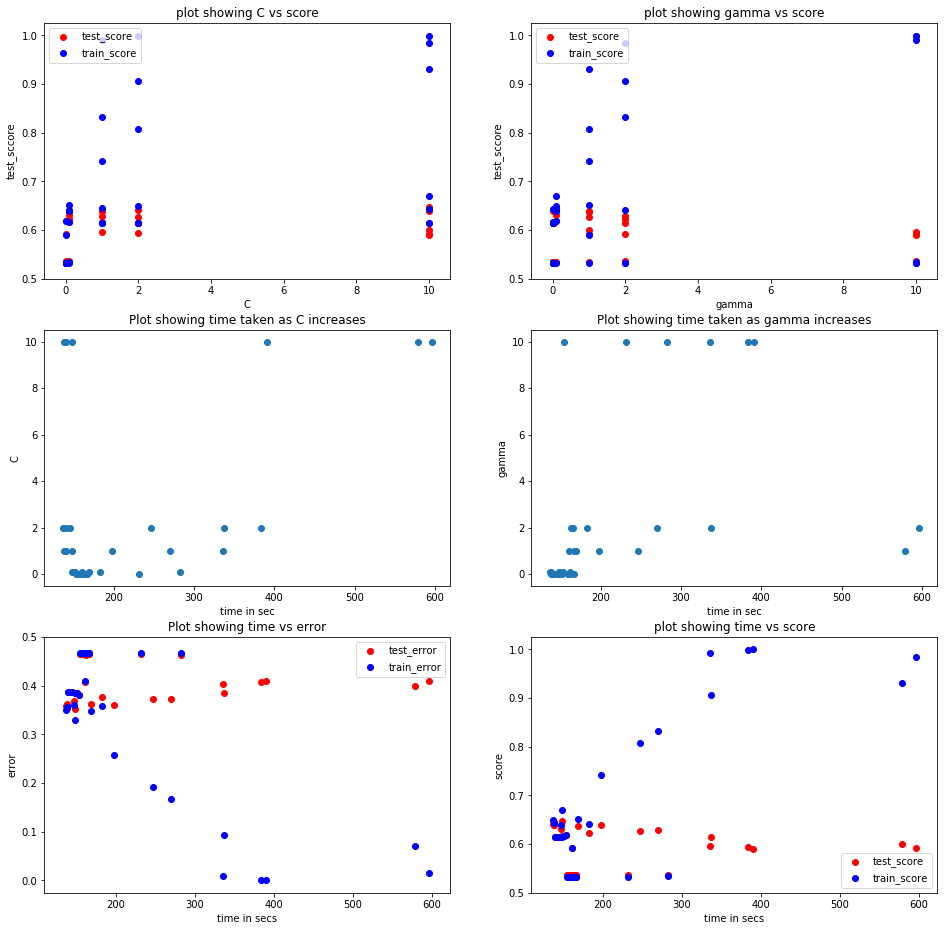

In [156]:
plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
plt.scatter('C','test_score',data=df1_svm_rbf,color='r')
plt.scatter('C','train_score',data=df1_svm_rbf,color='b')
plt.xlabel('C')
plt.ylabel('test_sccore')
plt.title('plot showing C vs score')
plt.legend(loc='upper left')
plt.subplot(3,2,2)
plt.scatter('gamma','test_score',data=df1_svm_rbf,color='r')
plt.scatter('gamma','train_score',data=df1_svm_rbf,color='b')
plt.xlabel('gamma')
plt.ylabel('test_sccore')
plt.title('plot showing gamma vs score')
plt.legend(loc='upper left')
plt.subplot(3,2,3)
plt.scatter('time','C',data=df1_svm_rbf)
plt.xlabel('time in sec')
plt.ylabel('C')
plt.title('Plot showing time taken as C increases')
plt.subplot(3,2,4)
plt.scatter('time','gamma',data=df1_svm_rbf)
plt.xlabel('time in sec')
plt.ylabel('gamma')
plt.title('Plot showing time taken as gamma increases')
plt.subplot(3,2,5)
plt.scatter('time','test_error',data=df1_svm_rbf,color='r')
plt.scatter('time','train_error',data=df1_svm_rbf,color='b')
plt.xlabel('time in secs')
plt.ylabel('error')
plt.legend(loc='upper right')
plt.title('Plot showing time vs error')
plt.subplot(3,2,6)
plt.scatter('time','test_score',data=df1_svm_rbf,color='r')
plt.scatter('time','train_score',data=df1_svm_rbf,color='b')
plt.xlabel('time in secs')
plt.ylabel('score')
plt.legend(loc='lower right')
plt.title('plot showing time vs score')
plt.show()

#### Implementation and experimentaion of svm sigmoid kernal with C [0.001,0.01,0.1,1,2,10]: penalty parameter of the error term and gamma [0.001,0.01,0.1,1,2,10]: kernal coefficient

In [16]:
def svm_sigmoid(i,j):
    import time
    time_start=time.clock()
    model1=svm.SVC(kernel='sigmoid',C=i,gamma=j)
    model1.fit(X_train,y_train)
    y_pred_train=model1.predict(X_train)
    y_pred_test=model1.predict(X_test)
    S_train=accuracy_score(y_train,y_pred_train)
    S_test=accuracy_score(y_test,y_pred_test)
    time_elapsed = (time.clock() - time_start)
    time_taken.append(time_elapsed)
    train_score.append(S_train)
    test_score.append(S_test)
    C.append(i)
    G.append(j)
    #print(i,j,time_elapsed,S_train,S_test)

### Dataframe containing hyperparamters, train and test scores, train and test error and computational time for svm sigmoid kernal data set1

In [17]:
c=[0.001,0.01,0.1,1,2,10]
gamma=[0.001,0.01,0.1,1,2,10]
train_score=[]
test_score=[]
time_taken=[]
C=[]
G=[]
for i in c:
    for j in gamma:
        svm_sigmoid(i,j)
df1_svm_sigmoid=pd.DataFrame()
df1_svm_sigmoid['C']=C
df1_svm_sigmoid['gamma']=G
df1_svm_sigmoid['train_score']=train_score
df1_svm_sigmoid['test_score']=test_score
df1_svm_sigmoid['train_error']=1-df1_svm_sigmoid['train_score']
df1_svm_sigmoid['test_error']=1-df1_svm_sigmoid['test_score']
df1_svm_sigmoid['time']=time_taken
df1_svm_sigmoid

C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,C,gamma,train_score,test_score,train_error,test_error,time
0,0.001,0.001,0.532757,0.535564,0.467243,0.464436,171.068594
1,0.001,0.010,0.532757,0.535564,0.467243,0.464436,170.940894
2,0.001,0.100,0.532757,0.535564,0.467243,0.464436,169.585774
3,0.001,1.000,0.613405,0.614680,0.386595,0.385320,176.835505
4,0.001,2.000,0.616685,0.615941,0.383315,0.384059,201.481893
5,0.001,10.000,0.609802,0.611653,0.390198,0.388347,206.218001
6,0.010,0.001,0.532757,0.535564,0.467243,0.464436,168.146046
7,0.010,0.010,0.532757,0.535564,0.467243,0.464436,168.678765
8,0.010,0.100,0.617730,0.618211,0.382270,0.381789,163.539794
9,0.010,1.000,0.534450,0.532285,0.465550,0.467715,185.512054


#### SVM sigmoid kernal experimentaion findings:
1. Best accuracy score is 0.632 with C=1 and gamma=0.1
2. As C increases there is a decrese in computational time.
3. As gamma increases there is a decrease till 1 and then increase in computational time.
4. As C and gamma increase, accuracy increases reaching a maximum value at C=1 and gamma=0.1
5. As the computational time increases error decreases

In [112]:
(df1_svm_sigmoid.sort_values(by='test_score',ascending=False)).head(1)

,C,gamma,train_score,test_score,train_error,test_error,time
20,1.0,0.1,0.634234,0.63284,0.365766,0.36716,157.928581


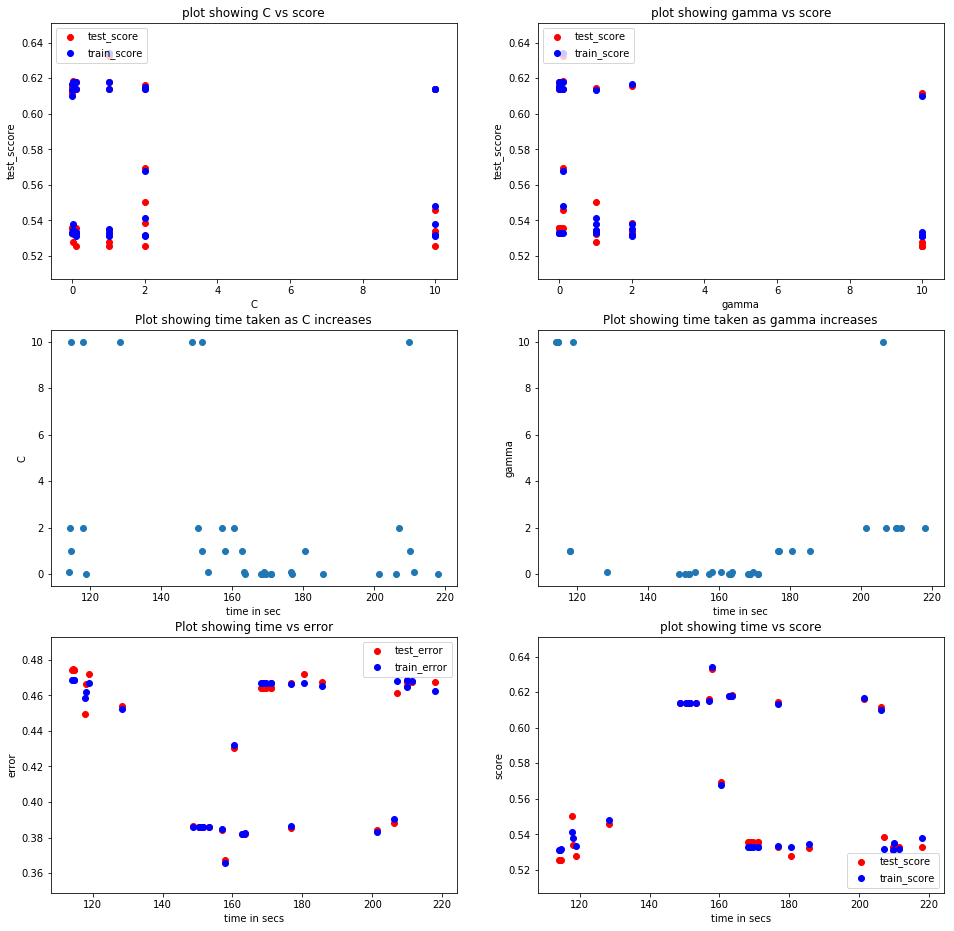

In [157]:
plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
plt.scatter('C','test_score',data=df1_svm_sigmoid,color='r')
plt.scatter('C','train_score',data=df1_svm_sigmoid,color='b')
plt.xlabel('C')
plt.ylabel('test_sccore')
plt.title('plot showing C vs score')
plt.legend(loc='upper left')
plt.subplot(3,2,2)
plt.scatter('gamma','test_score',data=df1_svm_sigmoid,color='r')
plt.scatter('gamma','train_score',data=df1_svm_sigmoid,color='b')
plt.xlabel('gamma')
plt.ylabel('test_sccore')
plt.title('plot showing gamma vs score')
plt.legend(loc='upper left')
plt.subplot(3,2,3)
plt.scatter('time','C',data=df1_svm_sigmoid)
plt.xlabel('time in sec')
plt.ylabel('C')
plt.title('Plot showing time taken as C increases')
plt.subplot(3,2,4)
plt.scatter('time','gamma',data=df1_svm_sigmoid)
plt.xlabel('time in sec')
plt.ylabel('gamma')
plt.title('Plot showing time taken as gamma increases')
plt.subplot(3,2,5)
plt.scatter('time','test_error',data=df1_svm_sigmoid,color='r')
plt.scatter('time','train_error',data=df1_svm_sigmoid,color='b')
plt.xlabel('time in secs')
plt.ylabel('error')
plt.legend(loc='upper right')
plt.title('Plot showing time vs error')
plt.subplot(3,2,6)
plt.scatter('time','test_score',data=df1_svm_sigmoid,color='r')
plt.scatter('time','train_score',data=df1_svm_sigmoid,color='b')
plt.xlabel('time in secs')
plt.ylabel('score')
plt.legend(loc='lower right')
plt.title('plot showing time vs score')
plt.show()

#### Implementation of decision tree classifier with gini index. gini index is used as criterion as entropy as logarthimic finctions which are computationally intensive.

In [18]:
from sklearn import tree
model2=tree.DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
s2=accuracy_score(y_test,y_pred2)
s2

0.5719690600302674

#### Experimentatiton with pruning in decisiontree classfier with max depth of the tree [5,10,50,100,500] and max leaf nodes nodes=[5,10,20]

In [26]:
def decisiontree(i,j):
    import time
    time_start=time.clock()
    model1=tree.DecisionTreeClassifier(criterion='gini', max_depth=i,
            max_leaf_nodes=j)
    model1.fit(X_train,y_train)
    y_pred_train=model1.predict(X_train)
    y_pred_test=model1.predict(X_test)
    S_train=accuracy_score(y_train,y_pred_train)
    S_test=accuracy_score(y_test,y_pred_test)
    time_elapsed = (time.clock() - time_start)
    time_taken.append(time_elapsed)
    train_score.append(S_train)
    test_score.append(S_test)
    D.append(i)
    L.append(j)
    #print(i,j,time_elapsed,S_train,S_test)

### Dataframe containing hyperparamters, train and test scores, train and test error and computational time for decision trees data set1

In [27]:
depth=[5,10,50,100,500]
nodes=[5,10,20]
train_score=[]
test_score=[]
time_taken=[]
D=[]
L=[]
for i in depth:
    for j in nodes:
        decisiontree(i,j)
df1_dt=pd.DataFrame()
df1_dt['max_depth']=D
df1_dt['max_leaf_nodes']=L
df1_dt['train_score']=train_score
df1_dt['test_score']=test_score
df1_dt['train_error']=1-df1_dt['train_score']
df1_dt['test_error']=1-df1_dt['test_score']
df1_dt['time']=time_taken
df1_dt

,max_depth,max_leaf_nodes,train_score,test_score,train_error,test_error,time
0,5,5,0.630342,0.623760,0.369658,0.376240,0.282625
1,5,10,0.641117,0.634353,0.358883,0.365647,0.357467
2,5,20,0.652396,0.639146,0.347604,0.360854,0.462436
3,10,5,0.630342,0.623760,0.369658,0.376240,0.288544
4,10,10,0.641117,0.634353,0.358883,0.365647,0.431333
5,10,20,0.647964,0.636876,0.352036,0.363124,0.650970
6,50,5,0.630342,0.623760,0.369658,0.376240,0.345393
7,50,10,0.641117,0.634353,0.358883,0.365647,0.460960
8,50,20,0.647964,0.636876,0.352036,0.363124,0.508585
9,100,5,0.630342,0.623760,0.369658,0.376240,0.331456


In [111]:
(df1_dt.sort_values(by='test_score',ascending=False)).head(1)

,max_depth,max_leaf_nodes,train_score,test_score,train_error,test_error,time
2,5,20,0.652396,0.639146,0.347604,0.360854,0.462436


#### Decision tree classifier experimentation with pre-pruning findings:
1. The best accuracy score is 0.639 at a max depth of 5 and max leaf nodes = 20.
2. As the max depth increases, time taken also increases as it becomes more ocmputationaly intensive.
3. As the max leaf nodes increases, time taken also increases as it becomes more ocmputationaly intensive.
4. With increase in max_leaf_nodes, accuracy score increases and error decreases till 20 and then decreases.



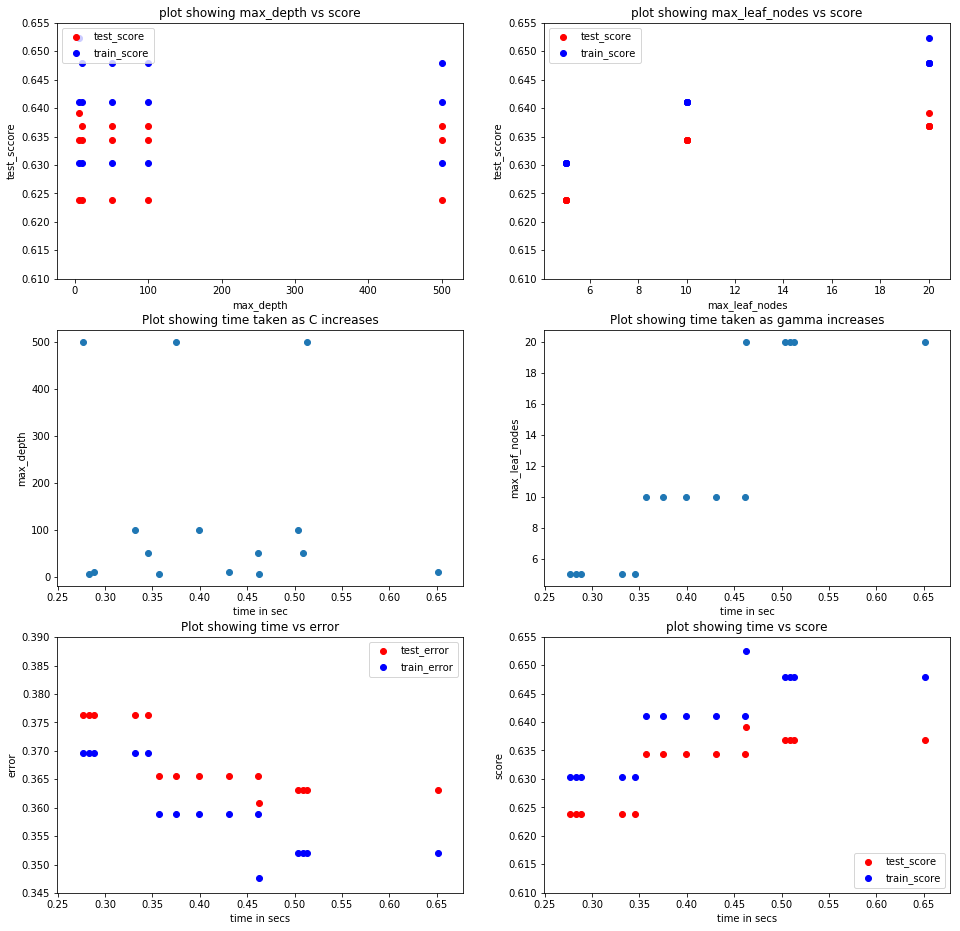

In [161]:
plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
plt.scatter('max_depth','test_score',data=df1_dt,color='r')
plt.scatter('max_depth','train_score',data=df1_dt,color='b')
plt.xlabel('max_depth')
plt.ylabel('test_sccore')
plt.title('plot showing max_depth vs score')
plt.legend(loc='upper left')
plt.subplot(3,2,2)
plt.scatter('max_leaf_nodes','test_score',data=df1_dt,color='r')
plt.scatter('max_leaf_nodes','train_score',data=df1_dt,color='b')
plt.xlabel('max_leaf_nodes')
plt.ylabel('test_sccore')
plt.title('plot showing max_leaf_nodes vs score')
plt.legend(loc='upper left')
plt.subplot(3,2,3)
plt.scatter('time','max_depth',data=df1_dt)
plt.xlabel('time in sec')
plt.ylabel('max_depth')
plt.title('Plot showing time taken as C increases')
plt.subplot(3,2,4)
plt.scatter('time','max_leaf_nodes',data=df1_dt)
plt.xlabel('time in sec')
plt.ylabel('max_leaf_nodes')
plt.title('Plot showing time taken as gamma increases')
plt.subplot(3,2,5)
plt.scatter('time','test_error',data=df1_dt,color='r')
plt.scatter('time','train_error',data=df1_dt,color='b')
plt.xlabel('time in secs')
plt.ylabel('error')
plt.legend(loc='upper right')
plt.title('Plot showing time vs error')
plt.subplot(3,2,6)
plt.scatter('time','test_score',data=df1_dt,color='r')
plt.scatter('time','train_score',data=df1_dt,color='b')
plt.xlabel('time in secs')
plt.ylabel('score')
plt.legend(loc='lower right')
plt.title('plot showing time vs score')
plt.show()

#### Implementation of adaboost classifier with decision tree as weak learner 

In [21]:
from sklearn.ensemble import AdaBoostClassifier
model3=AdaBoostClassifier(n_estimators=10)
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
s3=accuracy_score(y_test,y_pred3)
s3

C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6448629561123256

#### Experimentaion with adaboost classifier with the maximum number of estimators(at which boosting is terminated) and Learning rate (shrinks the contribution of each classifier). There is a trade-off between learning_rate=[5,10,50,100,200,250,300,500,1000,1500,2000] and n_estimators=[0.01,0.1,1,2,10]. This experiment aims to find the optimal value for best accuracy score.

In [95]:
def adaboost(i,j):
    import time
    time_start=time.clock()
    model1=AdaBoostClassifier(n_estimators=i,learning_rate=j)
    model1.fit(X_train,y_train)
    y_pred_train=model1.predict(X_train)
    y_pred_test=model1.predict(X_test)
    S_train=accuracy_score(y_train,y_pred_train)
    S_test=accuracy_score(y_test,y_pred_test)
    time_elapsed = (time.clock() - time_start)
    time_taken.append(time_elapsed)
    train_score.append(S_train)
    test_score.append(S_test)
    N.append(i)
    R.append(j)
    #print(i,j,time_elapsed,S_train,S_test)

### Dataframe containing hyperparamters, train and test scores, train and test error and computational time for adaboost data set1

In [96]:
n=[5,10,50,100,200,250,300,500,1000,1500,2000]
rate=[0.01,0.1,1,2,10]
train_score=[]
test_score=[]
time_taken=[]
N=[]
R=[]
for i in n:
    for j in rate:
        adaboost(i,j)
df1_adaboost=pd.DataFrame()
df1_adaboost['estimators']=N
df1_adaboost['learning_rate']=R
df1_adaboost['train_score']=train_score
df1_adaboost['test_score']=test_score
df1_adaboost['train_error']=1-df1_adaboost['train_score']
df1_adaboost['test_error']=1-df1_adaboost['test_score']
df1_adaboost['time']=time_taken
df1_adaboost

C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

,estimators,learning_rate,train_score,test_score,train_error,test_error,time
0,5,0.01,0.596216,0.595510,0.403784,0.404490,0.538351
1,5,0.10,0.607532,0.603413,0.392468,0.396587,0.495274
2,5,1.00,0.625153,0.619892,0.374847,0.380108,0.503567
3,5,2.00,0.596360,0.595426,0.403640,0.404574,0.550146
4,5,10.00,0.596216,0.595510,0.403784,0.404490,0.406792
5,10,0.01,0.596216,0.595510,0.403784,0.404490,1.104500
6,10,0.10,0.622342,0.616866,0.377658,0.383134,1.132443
7,10,1.00,0.654342,0.644863,0.345658,0.355137,1.088495
8,10,2.00,0.404468,0.404237,0.595532,0.595763,1.096950
9,10,10.00,0.467568,0.464268,0.532432,0.535732,0.487442


In [210]:
(df1_adaboost.sort_values(by='test_score',ascending=False)).head(5)

,estimators,learning_rate,train_score,test_score,train_error,test_error,time
41,1000,0.1,0.679135,0.663864,0.320865,0.336136,289.997353
46,1500,0.1,0.681405,0.663192,0.318595,0.336808,662.193955
51,2000,0.1,0.683964,0.663107,0.316036,0.336893,177.137378
32,300,1.0,0.686523,0.661090,0.313477,0.338910,28.324672
37,500,1.0,0.691207,0.660921,0.308793,0.339079,56.703370


#### Adaboost classifier experimentation findings :
1. The best accuracy score is 0.6638 with parameters n_estimators=1000 and learning rate=0.1
2. As the number of estimators increases, time taken also increases
3. As the learning rate increases, time taken is almost same till 2 and then decreases rapidly thereafter 
4. No linear relationship between accuracy score and time taken.
5. A high learing rate of 10 drstically reduces the time taken as we are shrinking the contribution of each classifier.

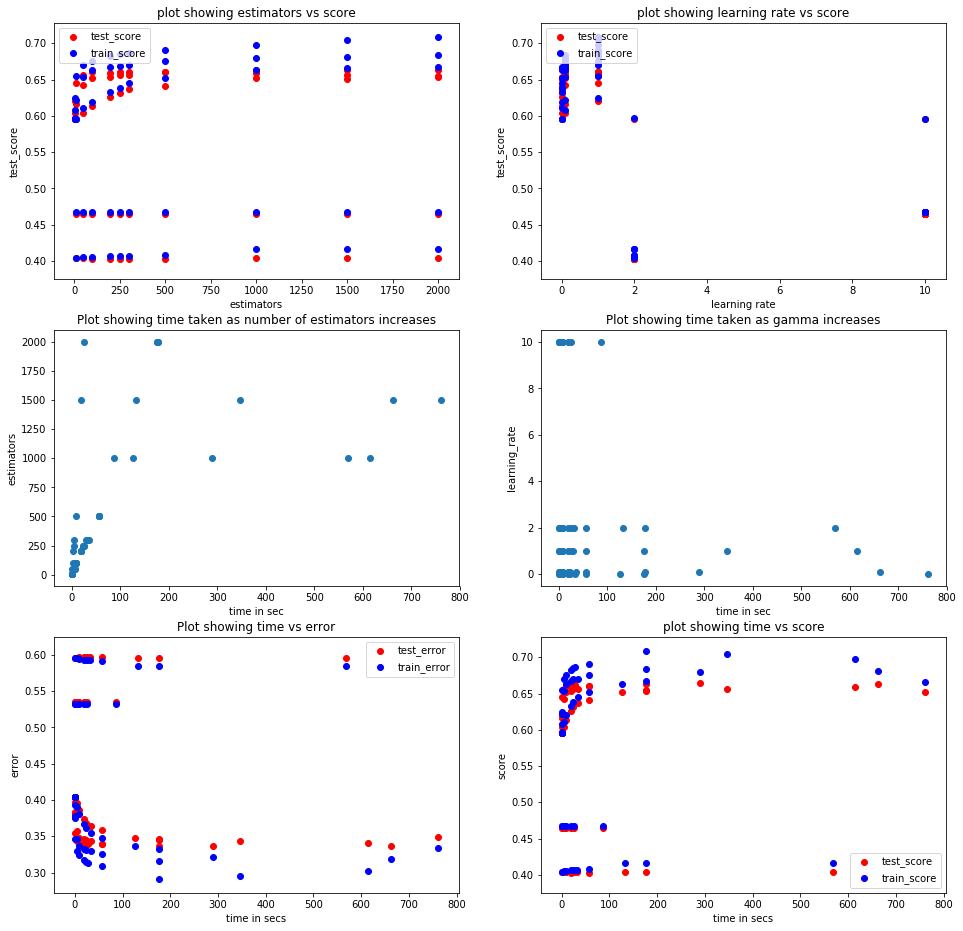

In [160]:
plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
plt.scatter('estimators','test_score',data=df1_adaboost,color='r')
plt.scatter('estimators','train_score',data=df1_adaboost,color='b')
plt.xlabel('estimators')
plt.ylabel('test_score')
plt.title('plot showing estimators vs score')
plt.legend(loc='upper left')
plt.subplot(3,2,2)
plt.scatter('learning_rate','test_score',data=df1_adaboost,color='r')
plt.scatter('learning_rate','train_score',data=df1_adaboost,color='b')
plt.xlabel('learning rate')
plt.ylabel('test_score')
plt.title('plot showing learning rate vs score')
plt.legend(loc='upper left')
plt.subplot(3,2,3)
plt.scatter('time','estimators',data=df1_adaboost)
plt.xlabel('time in sec')
plt.ylabel('estimators')
plt.title('Plot showing time taken as number of estimators increases')
plt.subplot(3,2,4)
plt.scatter('time','learning_rate',data=df1_adaboost)
plt.xlabel('time in sec')
plt.ylabel('learning_rate')
plt.title('Plot showing time taken as gamma increases')
plt.subplot(3,2,5)
plt.scatter('time','test_error',data=df1_adaboost,color='r')
plt.scatter('time','train_error',data=df1_adaboost,color='b')
plt.xlabel('time in secs')
plt.ylabel('error')
plt.legend(loc='upper right')
plt.title('Plot showing time vs error')
plt.subplot(3,2,6)
plt.scatter('time','test_score',data=df1_adaboost,color='r')
plt.scatter('time','train_score',data=df1_adaboost,color='b')
plt.xlabel('time in secs')
plt.ylabel('score')
plt.legend(loc='lower right')
plt.title('plot showing time vs score')
plt.show()

### Anslysis of the three classification algorithms on dataset 1:
1. Of the three classification models after experimentation with various hyperparameters, adaboost alogorithm has the best accuracy score of 0.6638.
2. Though adaboost acheived the best accuracy score, computationally it is the most intensive with 289 secs. SVM with the 3 kernals took an average time of 155 secs and decision trees took the least amount of time at 0.4 seccs.
3. Among the svm classifier with linear, rbf and sigmoid kernals, linear has the best accuracy score of 0.649 with rbf close behind at 0.648.

#### Implementing adaboost classifier with k-fold cross validation to generate a better generalised model and select the best hyperparameters.

In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
def svc_param_selection(X, y):
    import time
    time_start=time.clock()
    n=[5,10,50,100,200,250,300,500,1000,1500,2000]
    rate=[0.01,0.1,1,2,10]
    param_grid = {'n_estimators': n, 'learning_rate' : rate}
    cv=StratifiedKFold(n_splits=5, shuffle=False, random_state=123)
    grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, cv=cv)
    grid_search.fit(X, y)
    grid_search.best_params_
    time_elapsed = (time.clock() - time_start)
    print(time_elapsed)
    return grid_search.best_params_
svc_param_selection(features,shares)

C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

12617.654730271082


{'learning_rate': 0.01, 'n_estimators': 2000}

#### Adaboost classifier with crossvalidation findings:
1. The best hyperparamters as calculated by k-fold crossvalidation are learning_rate 0.01 and no of estiamtors 2000. These values are different from those observed above. This can be attributed to k-fold CV generating a better generalised model as it's evaluted on the whole dataset.
2. Computational time for k-fold cv is 12617 secs, making it the most computationally expensive of all the experiments.

#### Experimentation of adaboost computational time with increase in number of sample_size=[2000,5000,10000,20000,len(features)].

In [15]:
sample_size=[2000,5000,10000,20000,len(features)]
n_samples1=[]
n_time1=[]
n_accuracy1=[]
for i in sample_size:
    import time
    time_start=time.clock()
    X13=features.head(n=i)
    y13=shares.head(n=i)
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X13, y13, test_size=0.3, random_state=123)
    model13=AdaBoostClassifier(n_estimators=2000,learning_rate=0.01)
    model13.fit(X_train3,y_train3)
    y_pred1_3=model13.predict(X_test3)
    s1_3=accuracy_score(y_test3,y_pred1_3)
    time_elapsed = (time.clock() - time_start)
    n_samples1.append(i)
    n_time1.append(time_elapsed)
    n_accuracy1.append(s1_3)
df1_adaboost_time=pd.DataFrame()
df1_adaboost_time['no_samples']=n_samples1
df1_adaboost_time['time_taken']=n_time1
df1_adaboost_time['accuracy_score']=n_accuracy1

C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pvloh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [16]:
df1_adaboost_time

,no_samples,time_taken,accuracy_score
0,2000,10.314195,0.610000
1,5000,23.958596,0.634000
2,10000,45.184154,0.654333
3,20000,94.122019,0.646500
4,39644,188.840045,0.653607


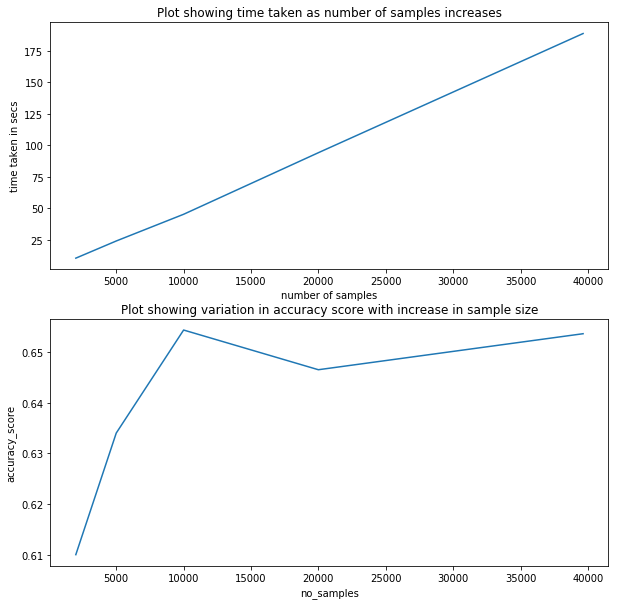

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot('no_samples','time_taken',data=df1_adaboost_time)
plt.xlabel('number of samples')
plt.ylabel('time taken in secs')
plt.title('Plot showing time taken as number of samples increases')
plt.subplot(2,1,2)
plt.plot('no_samples','accuracy_score',data=df1_adaboost_time)
plt.xlabel('no_samples')
plt.ylabel('accuracy_score')
plt.title('Plot showing variation in accuracy score with increase in sample size')
plt.show()

#### Experimentation of adaboost computational time with increase in number of samples findings:
1. There is positive linear relationship between computational time and numberof samples.
2. As the number of samples increases the accuracy score also increases with the maximum increase from 2000 to 10000 samples.

## Dataset 2

In [178]:
data1=pd.read_csv('census.csv')

In [179]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [180]:
data1.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [181]:
income_raw = data1['income']
features_raw = data1.drop('income', axis = 1)

In [182]:
#log transforming numerical money features capital-gain and capital-loss. Added 1 as some values are 0.
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data1[skewed].apply(lambda x: np.log(x + 1))

In [183]:
#Scaling of numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data1[numerical])

#### Task 1: conversion of income to two classes based on whether its greater than 50k.
As variables like work class, education_level, sex etc are categorical, they are converted to dummy variables and one dummy variable is dropped for each original variable to get rid of dummy trap 

In [184]:
features1 = pd.get_dummies(features_raw,drop_first=True)
income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)

#### Task3: Dividing data into test and train sets.

In [185]:
# Splitting data into test and train
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, income, test_size=0.3, random_state=123)


#### Implementation of svm with linear kernal

In [186]:
from sklearn import svm
model1=svm.SVC(kernel='linear')
model1.fit(X_train1,y_train1)
y_pred1_1=model1.predict(X_test1)
s1_1=accuracy_score(y_test1,y_pred1_1)
s1_1

0.8459497309648412

#### Experimentaion of svm linear kernal with change in C=[0.001,0.01,0.1,1,2,10]: penalty parameter of the error term.

In [187]:
def svm_linear1(i):
    import time
    time_start=time.clock()
    model1=svm.SVC(kernel='linear',C=i)
    model1.fit(X_train1,y_train1)
    y_pred_train1=model1.predict(X_train1)
    y_pred_test1=model1.predict(X_test1)
    S_train=accuracy_score(y_train1,y_pred_train1)
    S_test=accuracy_score(y_test1,y_pred_test1)
    time_elapsed = (time.clock() - time_start)
    time_taken.append(time_elapsed)
    train_score.append(S_train)
    test_score.append(S_test)
    C.append(i)

### Dataframe containing hyperparamters, train and test scores, train and test error and computational time for svm linear kernal dataset2

In [188]:
c=[0.001,0.01,0.1,1,2,10]
train_score=[]
test_score=[]
time_taken=[]
C=[]
for i in c:
    svm_linear1(i)
df2_svm_linear=pd.DataFrame()
df2_svm_linear['C']=C
df2_svm_linear['train_score']=train_score
df2_svm_linear['test_score']=test_score
df2_svm_linear['train_error']=1-df2_svm_linear['train_score']
df2_svm_linear['test_error']=1-df2_svm_linear['test_score']
df2_svm_linear['time']=time_taken
df2_svm_linear

,C,train_score,test_score,train_error,test_error,time
0,0.001,0.817343,0.820963,0.182657,0.179037,134.096040
1,0.010,0.831496,0.832535,0.168504,0.167465,113.720220
2,0.100,0.840594,0.840790,0.159406,0.159210,108.565037
3,1.000,0.847670,0.845950,0.152330,0.154050,108.152322
4,2.000,0.847007,0.846318,0.152993,0.153682,112.778063
5,10.000,0.846786,0.846023,0.153214,0.153977,136.470619


In [189]:
(df2_svm_linear.sort_values(by='test_score',ascending=False)).head(1)

,C,train_score,test_score,train_error,test_error,time
4,2.0,0.847007,0.846318,0.152993,0.153682,112.778063


#### SVM linear kernal experimentation findings:
1. The best accuracy score id 0.846 with C=2
2. As C increases there is an increase in accuracy score with maximjum gain from 0.001 to 2
3. Time taken increases with increase in accuracy
4. Time taken follows a non linear pattern with increase in C



C:\Users\pvloh\Anaconda3\lib\site-packages\matplotlib\pyplot.py:3261: RuntimeWarning: Second argument 'C' is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


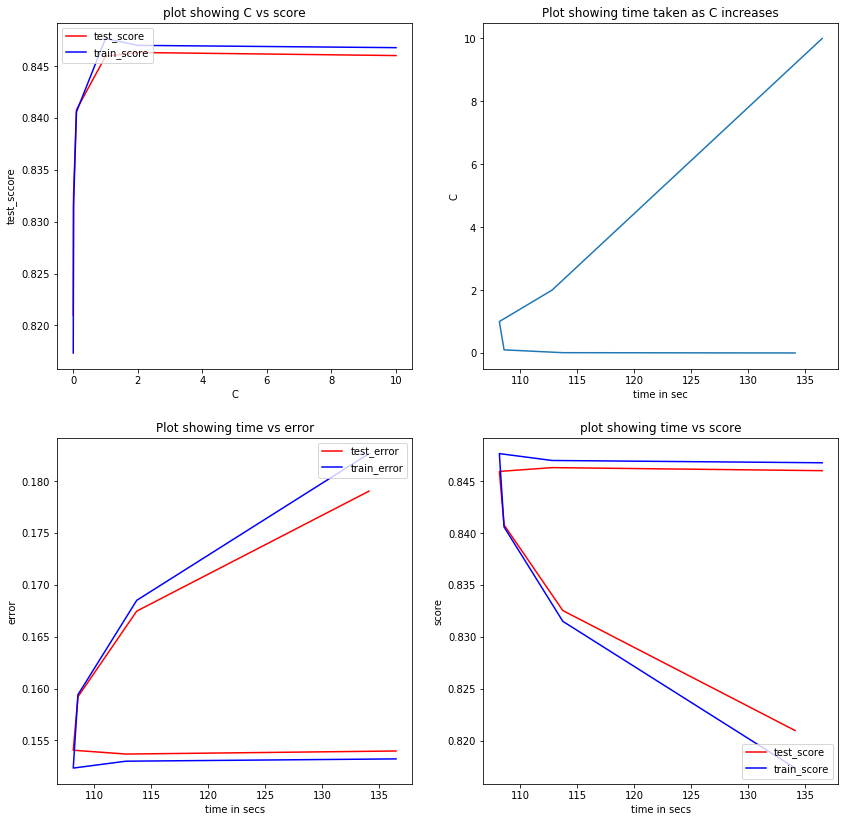

In [190]:
plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
plt.plot('C','test_score',data=df2_svm_linear,color='r')
plt.plot('C','train_score',data=df2_svm_linear,color='b')
plt.xlabel('C')
plt.ylabel('test_sccore')
plt.title('plot showing C vs score')
plt.legend(loc='upper left')
plt.subplot(2,2,2)
plt.plot('time','C',data=df2_svm_linear)
plt.xlabel('time in sec')
plt.ylabel('C')
plt.title('Plot showing time taken as C increases')
plt
plt.subplot(2,2,3)
plt.plot('time','test_error',data=df2_svm_linear,color='r')
plt.plot('time','train_error',data=df2_svm_linear,color='b')
plt.xlabel('time in secs')
plt.ylabel('error')
plt.legend(loc='upper right')
plt.title('Plot showing time vs error')
plt.subplot(2,2,4)
plt.plot('time','test_score',data=df2_svm_linear,color='r')
plt.plot('time','train_score',data=df2_svm_linear,color='b')
plt.xlabel('time in secs')
plt.ylabel('score')
plt.legend(loc='lower right')
plt.title('plot showing time vs score')
plt.show()

#### Implementation and experimentaion of svm rbf kernal with C=[0.001,0.01,0.1,1,2,10]: penalty parameter of the error term and gamma=[0.001,0.01,0.1,1,2,10]: kernal coefficient

In [191]:
def svm_rbf1(i,j):
    import time
    time_start=time.clock()
    model1=svm.SVC(kernel='rbf',C=i,gamma=j)
    model1.fit(X_train1,y_train1)
    y_pred_train1=model1.predict(X_train1)
    y_pred_test1=model1.predict(X_test1)
    S_train=accuracy_score(y_train1,y_pred_train1)
    S_test=accuracy_score(y_test1,y_pred_test1)
    time_elapsed = (time.clock() - time_start)
    time_taken.append(time_elapsed)
    train_score.append(S_train)
    test_score.append(S_test)
    C.append(i)
    G.append(j)
    #print(i,j,time_elapsed,S_train,S_test)

### Dataframe containing hyperparamters, train and test scores, train and test error and computational time for svm rbf kernal dataset2

In [192]:
c=[0.001,0.01,0.1,1,2,10]
gamma=[0.001,0.01,0.1,1,2,10]
train_score=[]
test_score=[]
time_taken=[]
C=[]
G=[]
for i in c:
    for j in gamma:
        svm_rbf1(i,j)
df2_svm_rbf=pd.DataFrame()
df2_svm_rbf['C']=C
df2_svm_rbf['gamma']=G
df2_svm_rbf['train_score']=train_score
df2_svm_rbf['test_score']=test_score
df2_svm_rbf['train_error']=1-df2_svm_rbf['train_score']
df2_svm_rbf['test_error']=1-df2_svm_rbf['test_score']
df2_svm_rbf['time']=time_taken
df2_svm_rbf

,C,gamma,train_score,test_score,train_error,test_error,time
0,0.001,0.001,0.750434,0.756173,0.249566,0.243827,158.375345
1,0.001,0.010,0.750434,0.756173,0.249566,0.243827,162.037725
2,0.001,0.100,0.750434,0.756173,0.249566,0.243827,162.048198
3,0.001,1.000,0.750434,0.756173,0.249566,0.243827,160.322862
4,0.001,2.000,0.750434,0.756173,0.249566,0.243827,158.788521
5,0.001,10.000,0.750434,0.756173,0.249566,0.243827,163.204895
6,0.010,0.001,0.750434,0.756173,0.249566,0.243827,162.676681
7,0.010,0.010,0.750434,0.756173,0.249566,0.243827,163.447578
8,0.010,0.100,0.821955,0.823026,0.178045,0.176974,159.217739
9,0.010,1.000,0.780161,0.783814,0.219839,0.216186,215.781959


In [193]:
(df2_svm_rbf.sort_values(by='test_score',ascending=False)).head(1)

,C,gamma,train_score,test_score,train_error,test_error,time
32,10.0,0.1,0.864318,0.847055,0.135682,0.152945,137.081265


#### SVM rbf kernal experimentaion findings:
1. Best accuracy score is 0.0.847 with C=10 and gamma=0.1
2. As C increases there is a decrese in computationla time.
3. As gamma increases there is an increase in computational time.
4. As C and gamma increase, accuracy increases reaching a maximum value at C=10 and gamma=0.1
5. As the computational time increases error decreases



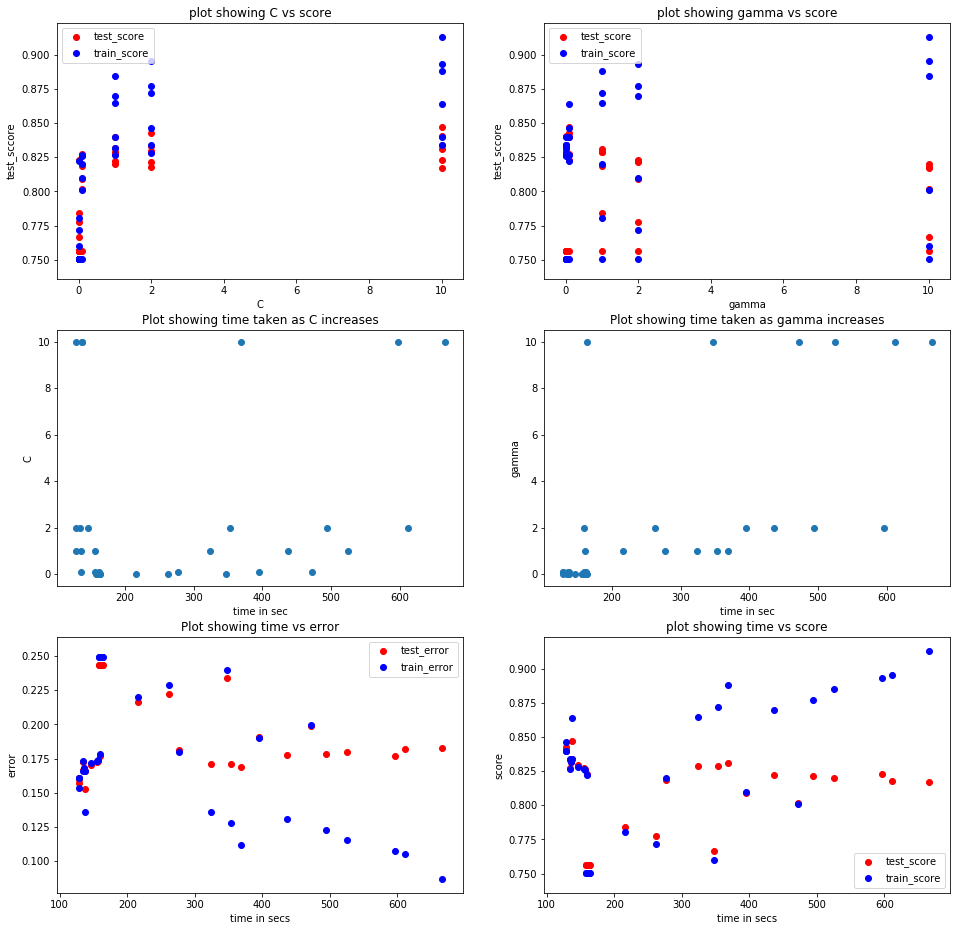

In [194]:
plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
plt.scatter('C','test_score',data=df2_svm_rbf,color='r')
plt.scatter('C','train_score',data=df2_svm_rbf,color='b')
plt.xlabel('C')
plt.ylabel('test_sccore')
plt.title('plot showing C vs score')
plt.legend(loc='upper left')
plt.subplot(3,2,2)
plt.scatter('gamma','test_score',data=df2_svm_rbf,color='r')
plt.scatter('gamma','train_score',data=df2_svm_rbf,color='b')
plt.xlabel('gamma')
plt.ylabel('test_sccore')
plt.title('plot showing gamma vs score')
plt.legend(loc='upper left')
plt.subplot(3,2,3)
plt.scatter('time','C',data=df2_svm_rbf)
plt.xlabel('time in sec')
plt.ylabel('C')
plt.title('Plot showing time taken as C increases')
plt.subplot(3,2,4)
plt.scatter('time','gamma',data=df2_svm_rbf)
plt.xlabel('time in sec')
plt.ylabel('gamma')
plt.title('Plot showing time taken as gamma increases')
plt.subplot(3,2,5)
plt.scatter('time','test_error',data=df2_svm_rbf,color='r')
plt.scatter('time','train_error',data=df2_svm_rbf,color='b')
plt.xlabel('time in secs')
plt.ylabel('error')
plt.legend(loc='upper right')
plt.title('Plot showing time vs error')
plt.subplot(3,2,6)
plt.scatter('time','test_score',data=df2_svm_rbf,color='r')
plt.scatter('time','train_score',data=df2_svm_rbf,color='b')
plt.xlabel('time in secs')
plt.ylabel('score')
plt.legend(loc='lower right')
plt.title('plot showing time vs score')
plt.show()

#### Implementation and experimentaion of svm sigmoid kernal with C=[0.001,0.01,0.1,1,2,10]: penalty parameter of the error term and gamma=[0.001,0.01,0.1,1,2,10]: kernal coefficient

In [195]:
def svm_sigmoid1(i,j):
    import time
    time_start=time.clock()
    model1=svm.SVC(kernel='sigmoid',C=i,gamma=j)
    model1.fit(X_train1,y_train1)
    y_pred_train1=model1.predict(X_train1)
    y_pred_test1=model1.predict(X_test1)
    S_train=accuracy_score(y_train1,y_pred_train1)
    S_test=accuracy_score(y_test1,y_pred_test1)
    time_elapsed = (time.clock() - time_start)
    time_taken.append(time_elapsed)
    train_score.append(S_train)
    test_score.append(S_test)
    C.append(i)
    G.append(j)
    #print(i,j,time_elapsed,S_train,S_test)

### Dataframe containing hyperparamters, train and test scores, train and test error and computational time for svm sigmoid kernal dataset2

In [196]:
c=[0.001,0.01,0.1,1,2,10]
gamma=[0.001,0.01,0.1,1,2,10]
train_score=[]
test_score=[]
time_taken=[]
C=[]
G=[]
for i in c:
    for j in gamma:
        svm_sigmoid1(i,j)
df2_svm_sigmoid=pd.DataFrame()
df2_svm_sigmoid['C']=C
df2_svm_sigmoid['gamma']=G
df2_svm_sigmoid['train_score']=train_score
df2_svm_sigmoid['test_score']=test_score
df2_svm_sigmoid['train_error']=1-df2_svm_sigmoid['train_score']
df2_svm_sigmoid['test_error']=1-df2_svm_sigmoid['test_score']
df2_svm_sigmoid['time']=time_taken
df2_svm_sigmoid

,C,gamma,train_score,test_score,train_error,test_error,time
0,0.001,0.001,0.750434,0.756173,0.249566,0.243827,149.476876
1,0.001,0.010,0.750434,0.756173,0.249566,0.243827,151.996515
2,0.001,0.100,0.750434,0.756173,0.249566,0.243827,152.806878
3,0.001,1.000,0.749929,0.755289,0.250071,0.244711,192.228037
4,0.001,2.000,0.750403,0.755878,0.249597,0.244122,196.151019
5,0.001,10.000,0.750434,0.756173,0.249566,0.243827,146.053386
6,0.010,0.001,0.750434,0.756173,0.249566,0.243827,151.707485
7,0.010,0.010,0.750434,0.756173,0.249566,0.243827,155.354315
8,0.010,0.100,0.767051,0.772757,0.232949,0.227243,160.443767
9,0.010,1.000,0.665108,0.670671,0.334892,0.329329,184.309605


In [197]:
(df2_svm_sigmoid.sort_values(by='test_score',ascending=False)).head(1)

,C,gamma,train_score,test_score,train_error,test_error,time
31,10.0,0.01,0.840878,0.840643,0.159122,0.159357,128.788784


#### SVM sigmoid kernal experimentaion findings:
1. Best accuracy score is 0.840 with C=10 and gamma=0.01
2. As C increases there is a decrese in computational time.
3. As gamma increases there is a decrease till 1 and then increase in computational time.
4. As C and gamma increase, accuracy increases reaching a maximum value at C=10 and gamma=0.01
5. As the computational time increases error decreases



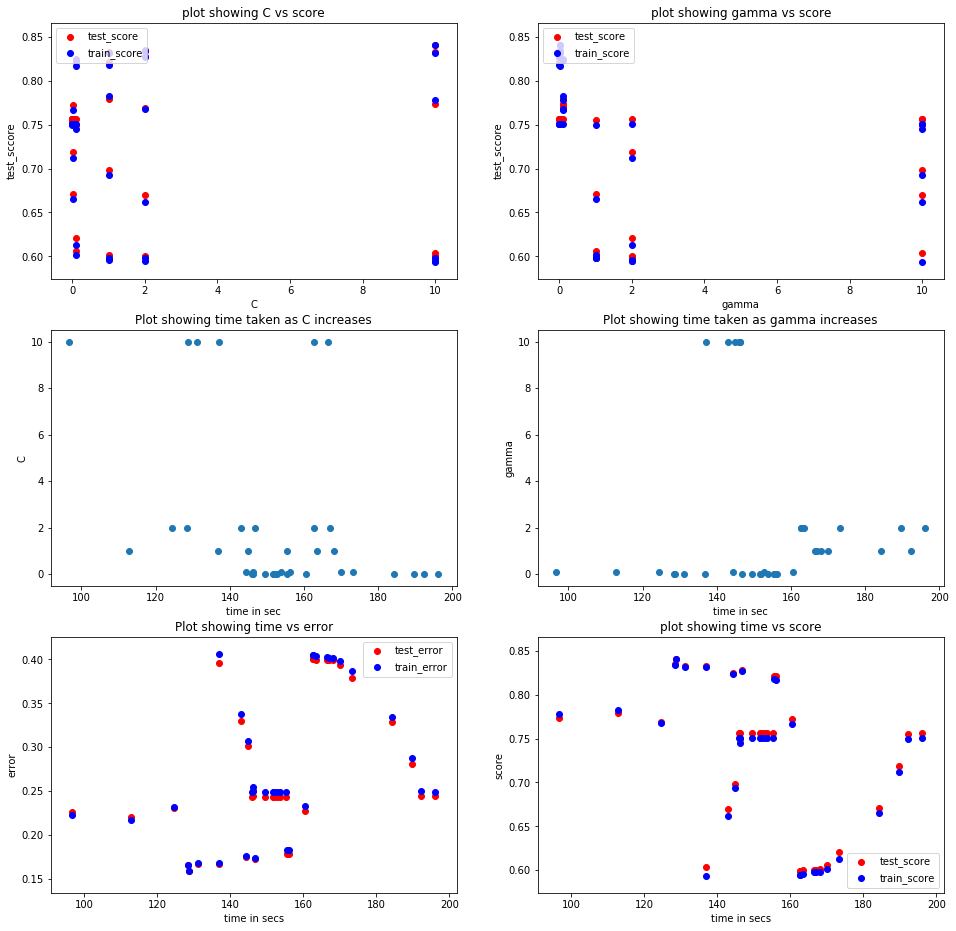

In [198]:
plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
plt.scatter('C','test_score',data=df2_svm_sigmoid,color='r')
plt.scatter('C','train_score',data=df2_svm_sigmoid,color='b')
plt.xlabel('C')
plt.ylabel('test_sccore')
plt.title('plot showing C vs score')
plt.legend(loc='upper left')
plt.subplot(3,2,2)
plt.scatter('gamma','test_score',data=df2_svm_sigmoid,color='r')
plt.scatter('gamma','train_score',data=df2_svm_sigmoid,color='b')
plt.xlabel('gamma')
plt.ylabel('test_sccore')
plt.title('plot showing gamma vs score')
plt.legend(loc='upper left')
plt.subplot(3,2,3)
plt.scatter('time','C',data=df2_svm_sigmoid)
plt.xlabel('time in sec')
plt.ylabel('C')
plt.title('Plot showing time taken as C increases')
plt.subplot(3,2,4)
plt.scatter('time','gamma',data=df2_svm_sigmoid)
plt.xlabel('time in sec')
plt.ylabel('gamma')
plt.title('Plot showing time taken as gamma increases')
plt.subplot(3,2,5)
plt.scatter('time','test_error',data=df2_svm_sigmoid,color='r')
plt.scatter('time','train_error',data=df2_svm_sigmoid,color='b')
plt.xlabel('time in secs')
plt.ylabel('error')
plt.legend(loc='upper right')
plt.title('Plot showing time vs error')
plt.subplot(3,2,6)
plt.scatter('time','test_score',data=df2_svm_sigmoid,color='r')
plt.scatter('time','train_score',data=df2_svm_sigmoid,color='b')
plt.xlabel('time in secs')
plt.ylabel('score')
plt.legend(loc='lower right')
plt.title('plot showing time vs score')
plt.show()

#### Implementation of decision tree classifier with gini index. gini index is used as criterion as entropy as logarthimic finctions which are computationally intensive. Experimentation with pruning in decisiontree classfier with max depth of the tree=[5,10,50,100,500] and max leaf nodes=[5,10,20]

In [199]:
def decisiontree1(i,j):
    import time
    time_start=time.clock()
    model1=tree.DecisionTreeClassifier(criterion='gini', max_depth=i,
            max_leaf_nodes=j)
    model1.fit(X_train1,y_train1)
    y_pred_train1=model1.predict(X_train1)
    y_pred_test1=model1.predict(X_test1)
    S_train=accuracy_score(y_train1,y_pred_train1)
    S_test=accuracy_score(y_test1,y_pred_test1)
    time_elapsed = (time.clock() - time_start)
    time_taken.append(time_elapsed)
    train_score.append(S_train)
    test_score.append(S_test)
    D.append(i)
    L.append(j)

### Dataframe containing hyperparamters, train and test scores, train and test error and computational time for decision trees dataset 2

In [200]:
depth=[5,10,50,100,500]
nodes=[5,10,20]
train_score=[]
test_score=[]
time_taken=[]
D=[]
L=[]
for i in depth:
    for j in nodes:
        decisiontree1(i,j)
df2_dt=pd.DataFrame()
df2_dt['max_depth']=D
df2_dt['max_leaf_nodes']=L
df2_dt['train_score']=train_score
df2_dt['test_score']=test_score
df2_dt['train_error']=1-df2_dt['train_score']
df2_dt['test_error']=1-df2_dt['test_score']
df2_dt['time']=time_taken
df2_dt

,max_depth,max_leaf_nodes,train_score,test_score,train_error,test_error,time
0,5,5,0.839741,0.840348,0.160259,0.159652,0.116330
1,5,10,0.845775,0.845139,0.154225,0.154861,0.134171
2,5,20,0.851050,0.851846,0.148950,0.148154,0.146055
3,10,5,0.839741,0.840348,0.160259,0.159652,0.108163
4,10,10,0.845775,0.845139,0.154225,0.154861,0.134711
5,10,20,0.852567,0.853099,0.147433,0.146901,0.174216
6,50,5,0.839741,0.840348,0.160259,0.159652,0.120175
7,50,10,0.845775,0.845139,0.154225,0.154861,0.140972
8,50,20,0.852567,0.853099,0.147433,0.146901,0.161358
9,100,5,0.839741,0.840348,0.160259,0.159652,0.111092


In [201]:
(df2_dt.sort_values(by='test_score',ascending=False)).head(1)

,max_depth,max_leaf_nodes,train_score,test_score,train_error,test_error,time
5,10,20,0.852567,0.853099,0.147433,0.146901,0.174216


#### Decision tree classifier experimentation with pre-pruning findings:
1. The best accuracy score is 0.853 at a max depth of 10 and max leaf nodes = 20.
2. As the max depth increases, time taken also increases as it becomes more computationaly intensive.
3. As the max leaf nodes increases, time taken also increases as it becomes more computationaly intensive.
4. With increase in max_leaf_nodes, accuracy score increases and error decreases.

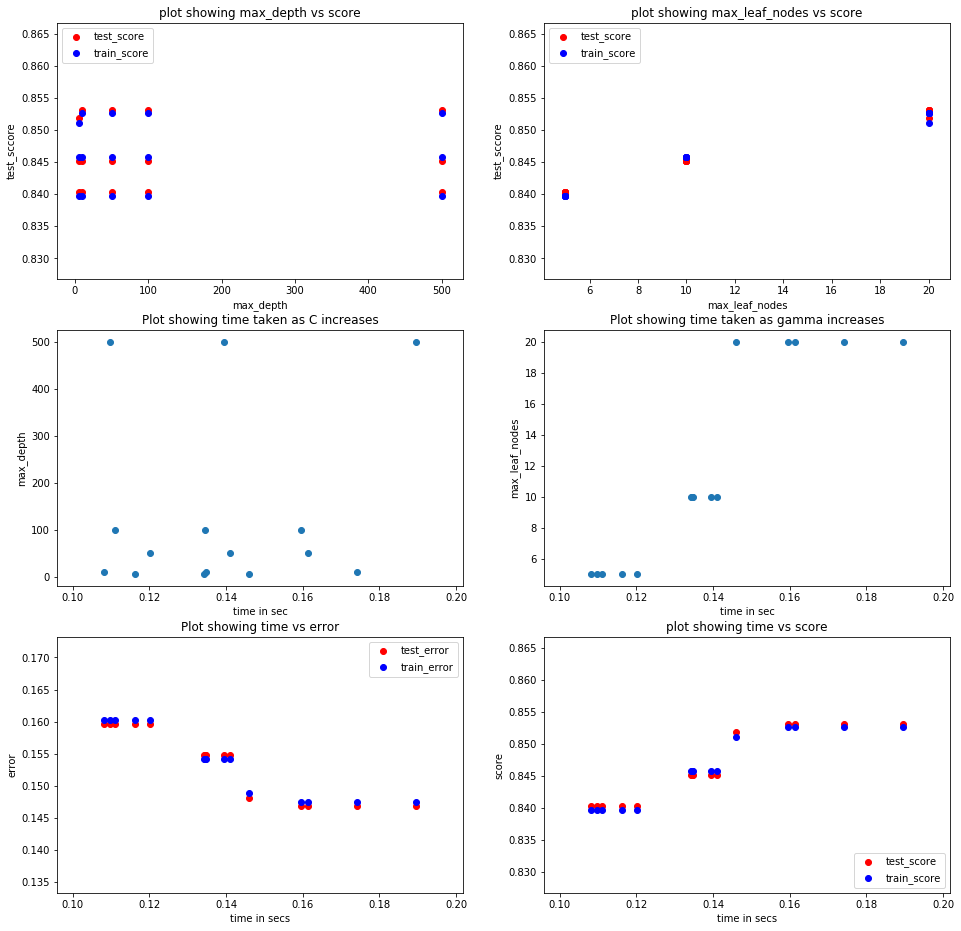

In [202]:
plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
plt.scatter('max_depth','test_score',data=df2_dt,color='r')
plt.scatter('max_depth','train_score',data=df2_dt,color='b')
plt.xlabel('max_depth')
plt.ylabel('test_sccore')
plt.title('plot showing max_depth vs score')
plt.legend(loc='upper left')
plt.subplot(3,2,2)
plt.scatter('max_leaf_nodes','test_score',data=df2_dt,color='r')
plt.scatter('max_leaf_nodes','train_score',data=df2_dt,color='b')
plt.xlabel('max_leaf_nodes')
plt.ylabel('test_sccore')
plt.title('plot showing max_leaf_nodes vs score')
plt.legend(loc='upper left')
plt.subplot(3,2,3)
plt.scatter('time','max_depth',data=df2_dt)
plt.xlabel('time in sec')
plt.ylabel('max_depth')
plt.title('Plot showing time taken as C increases')
plt.subplot(3,2,4)
plt.scatter('time','max_leaf_nodes',data=df2_dt)
plt.xlabel('time in sec')
plt.ylabel('max_leaf_nodes')
plt.title('Plot showing time taken as gamma increases')
plt.subplot(3,2,5)
plt.scatter('time','test_error',data=df2_dt,color='r')
plt.scatter('time','train_error',data=df2_dt,color='b')
plt.xlabel('time in secs')
plt.ylabel('error')
plt.legend(loc='upper right')
plt.title('Plot showing time vs error')
plt.subplot(3,2,6)
plt.scatter('time','test_score',data=df2_dt,color='r')
plt.scatter('time','train_score',data=df2_dt,color='b')
plt.xlabel('time in secs')
plt.ylabel('score')
plt.legend(loc='lower right')
plt.title('plot showing time vs score')
plt.show()

#### Implementation of adaboost classifier with decision tree as weak learner and Experimentaion with the maximum number of estimators(at which boosting is terminated) and Learning rate (shrinks the contribution of each classifier). There is a trade-off between learning_rate=[5,10,50,100,200,250,300,500,1000,1500,2000] and n_estimators=[0.01,0.1,1,2,10]. This experiment aims to find the optimal value for best accuracy score.

In [203]:
def adaboost1(i,j):
    import time
    time_start=time.clock()
    model1=AdaBoostClassifier(n_estimators=i,learning_rate=j)
    model1.fit(X_train1,y_train1)
    y_pred_train1=model1.predict(X_train1)
    y_pred_test1=model1.predict(X_test1)
    S_train=accuracy_score(y_train1,y_pred_train1)
    S_test=accuracy_score(y_test1,y_pred_test1)
    time_elapsed = (time.clock() - time_start)
    time_taken.append(time_elapsed)
    train_score.append(S_train)
    test_score.append(S_test)
    N.append(i)
    R.append(j)
    #print(i,j,time_elapsed,S_train,S_test)

### Dataframe containing hyperparamters, train and test scores, train and test error and computational time for adaboost dataset 2

In [204]:
n=[5,10,50,100,200,250,300,500,1000,1500,2000]
rate=[0.01,0.1,1,2,10]
train_score=[]
test_score=[]
time_taken=[]
N=[]
R=[]
for i in n:
    for j in rate:
        adaboost1(i,j)
df2_adaboost=pd.DataFrame()
df2_adaboost['estimators']=N
df2_adaboost['learning_rate']=R
df2_adaboost['train_score']=train_score
df2_adaboost['test_score']=test_score
df2_adaboost['train_error']=1-df2_adaboost['train_score']
df2_adaboost['test_error']=1-df2_adaboost['test_score']
df2_adaboost['time']=time_taken
df2_adaboost

,estimators,learning_rate,train_score,test_score,train_error,test_error,time
0,5,0.01,0.750434,0.756173,0.249566,0.243827,0.214339
1,5,0.10,0.787332,0.791848,0.212668,0.208152,0.218734
2,5,1.00,0.838383,0.840716,0.161617,0.159284,0.208725
3,5,2.00,0.750434,0.756173,0.249566,0.243827,0.208261
4,5,10.00,0.750434,0.756173,0.249566,0.243827,0.168478
5,10,0.01,0.750434,0.756173,0.249566,0.243827,0.367357
6,10,0.10,0.787332,0.791848,0.212668,0.208152,0.357641
7,10,1.00,0.848460,0.847719,0.151540,0.152281,0.361405
8,10,2.00,0.249566,0.243827,0.750434,0.756173,0.364435
9,10,10.00,0.249566,0.243827,0.750434,0.756173,0.246006


In [205]:
(df2_adaboost.sort_values(by='test_score',ascending=False)).head(1)

,estimators,learning_rate,train_score,test_score,train_error,test_error,time
52,2000,1.0,0.871521,0.868799,0.128479,0.131201,61.720379


#### Adaboost classifier experimentation findings :
1. The best accuracy score is 0.868 with parameters n_estimators=2000 and learning rate=1
2. As the number of estimators increases, time taken also increases
3. As the learning rate increases, time taken is almost same till 2 and then decreases rapidly thereafter
4. No linear relationship between accuracy score and time taken.
5. A high learing rate of 10 as number of estimators increase drastically reduces the time taken as we are shrinking the contribution of each classifier.



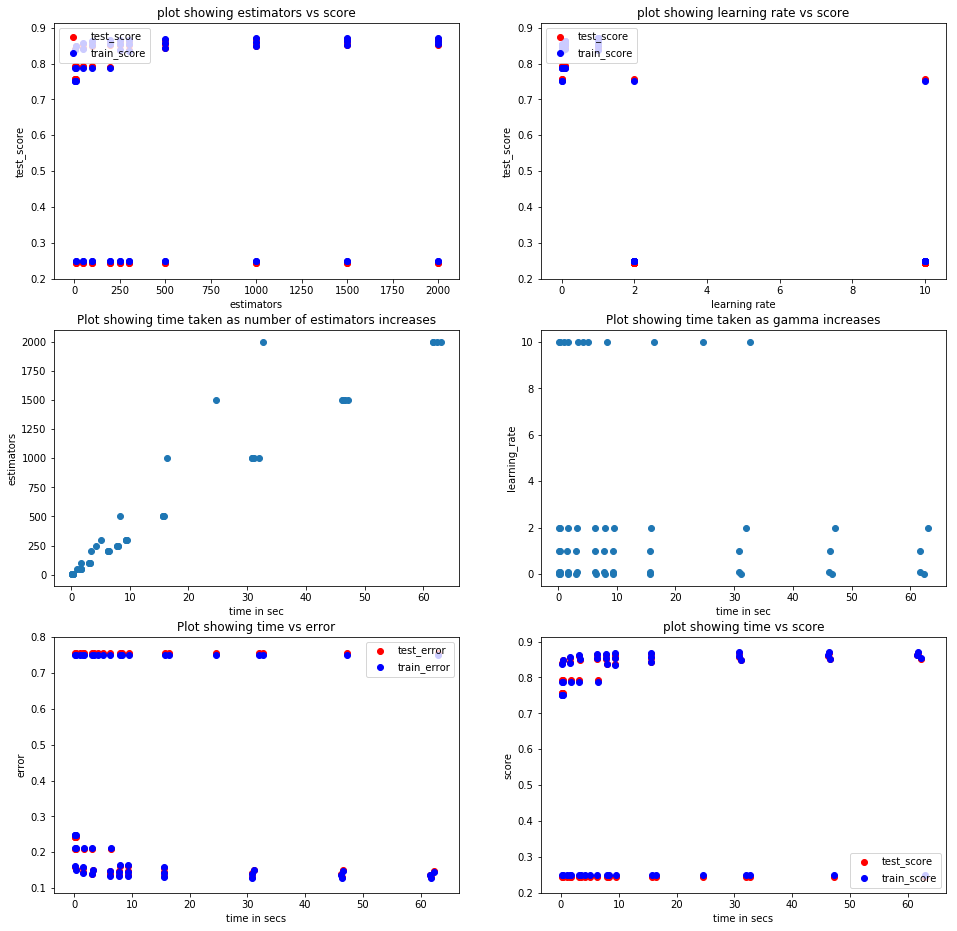

In [206]:
plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
plt.scatter('estimators','test_score',data=df2_adaboost,color='r')
plt.scatter('estimators','train_score',data=df2_adaboost,color='b')
plt.xlabel('estimators')
plt.ylabel('test_score')
plt.title('plot showing estimators vs score')
plt.legend(loc='upper left')
plt.subplot(3,2,2)
plt.scatter('learning_rate','test_score',data=df2_adaboost,color='r')
plt.scatter('learning_rate','train_score',data=df2_adaboost,color='b')
plt.xlabel('learning rate')
plt.ylabel('test_score')
plt.title('plot showing learning rate vs score')
plt.legend(loc='upper left')
plt.subplot(3,2,3)
plt.scatter('time','estimators',data=df2_adaboost)
plt.xlabel('time in sec')
plt.ylabel('estimators')
plt.title('Plot showing time taken as number of estimators increases')
plt.subplot(3,2,4)
plt.scatter('time','learning_rate',data=df2_adaboost)
plt.xlabel('time in sec')
plt.ylabel('learning_rate')
plt.title('Plot showing time taken as gamma increases')
plt.subplot(3,2,5)
plt.scatter('time','test_error',data=df2_adaboost,color='r')
plt.scatter('time','train_error',data=df2_adaboost,color='b')
plt.xlabel('time in secs')
plt.ylabel('error')
plt.legend(loc='upper right')
plt.title('Plot showing time vs error')
plt.subplot(3,2,6)
plt.scatter('time','test_score',data=df2_adaboost,color='r')
plt.scatter('time','train_score',data=df2_adaboost,color='b')
plt.xlabel('time in secs')
plt.ylabel('score')
plt.legend(loc='lower right')
plt.title('plot showing time vs score')
plt.show()

#### Anslysis of the three classification algorithms on dataset 2:
1. Of the three classification models after experimentation with various hyperparameters, adaboost alogorithm has the best accuracy score of 0.868.
2. Adaboost acheived the best accuracy score with a computational time of 61.7 secs. SVM with the 3 kernals took an average time of 125 secs and decision trees took the least amount of time at 0.17 seccs.
3. Among the svm classifier with linear, rbf and sigmoid kernals, rbf has the best accuracy score of 0.0.847 with linear close behind at 0.0.846.



#### Implementing adaboost classifier with k-fold cross validation to generate a better generalised model and select the best hyperparameters.

In [208]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
def svc_param_selection(X, y):
    import time
    time_start=time.clock()
    n=[5,10,50,100,200,250,300,500,1000,1500,2000]
    rate=[0.01,0.1,1,2,10]
    param_grid = {'n_estimators': n, 'learning_rate' : rate}
    cv=StratifiedKFold(n_splits=5, shuffle=False, random_state=123)
    grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, cv=cv)
    grid_search.fit(X, y)
    grid_search.best_params_
    time_elapsed = (time.clock() - time_start)
    print(time_elapsed)
    return grid_search.best_params_
svc_param_selection(features1,income)

4727.515424186131


{'learning_rate': 1, 'n_estimators': 2000}

#### Adaboost classifier with crossvalidation findings:
1. The best hyperparamters as calculated by k-fold crossvalidation are learning_rate 1 and no of estiamtors 2000. These values are same those observed above. This conforms that the model generated is a good generalised model.
2. Computational time for k-fold cv is 4724 secs, making it the most computationally expensive of all the experiments for this dataset.


#### Experimentation of adaboost computational time with increase in number of samples=[2000,5000,10000,20000,len(features1)].

In [219]:
sample_size=[2000,5000,10000,20000,len(features1)]
n_samples2=[]
n_time2=[]
n_accuracy2=[]
for i in sample_size:
    import time
    time_start=time.clock()
    X14=features1.head(n=i)
    y14=income.head(n=i)
    X_train4, X_test4, y_train4, y_test4 = train_test_split(X14, y14, test_size=0.3, random_state=123)
    model14=AdaBoostClassifier(n_estimators=2000,learning_rate=1)
    model14.fit(X_train4,y_train4)
    y_pred1_4=model14.predict(X_test4)
    s1_4=accuracy_score(y_test4,y_pred1_4)
    time_elapsed = (time.clock() - time_start)
    n_samples2.append(i)
    n_time2.append(time_elapsed)
    n_accuracy2.append(s1_4)
df2_adaboost_time=pd.DataFrame()
df2_adaboost_time['no_samples']=n_samples2
df2_adaboost_time['time_taken']=n_time2
df2_adaboost_time['accuracy_score']=n_accuracy2

In [220]:
df2_adaboost_time

,no_samples,time_taken,accuracy_score
0,2000,4.095320,0.863333
1,5000,7.355583,0.838000
2,10000,12.877126,0.856333
3,20000,24.981328,0.859333
4,45222,55.391657,0.868799


#### Experimentation of adaboost computational time with increase in number of samples findings:
1. There is positive linear relationship between computational time and numberof samples.
2. As the number of samples increases the accuracy score also increases with the maximum increase from 5000 to 10000 samples.

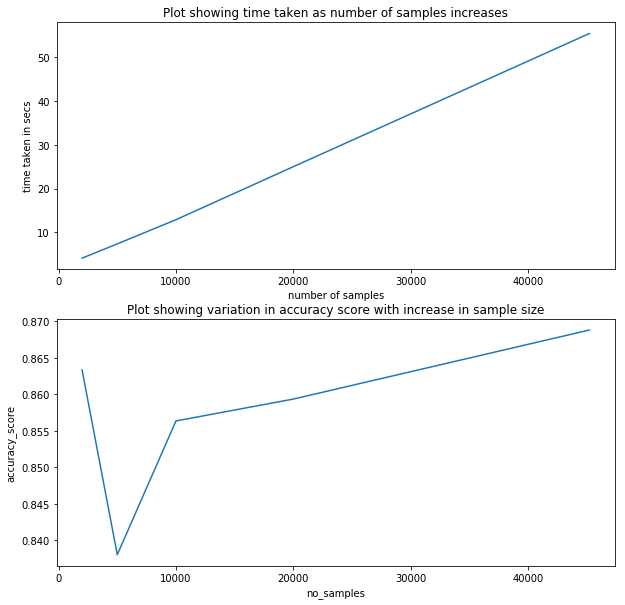

In [226]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot('no_samples','time_taken',data=df2_adaboost_time)
plt.xlabel('number of samples')
plt.ylabel('time taken in secs')
plt.title('Plot showing time taken as number of samples increases')
plt.subplot(2,1,2)
plt.plot('no_samples','accuracy_score',data=df2_adaboost_time)
plt.xlabel('no_samples')
plt.ylabel('accuracy_score')
plt.title('Plot showing variation in accuracy score with increase in sample size')
plt.show()

### Conclusion: 
1. Adaboost is the best classifier for both the datasets.
2. Decision trees take the shortest computational time among the three algorithms.
3. Implementing k-fold cross validation for all algorithms and calculating accuracy score, error rate and time_taken with cross-validation would result in better generalised models but that was not done as k-fold cross validation is comptationally very expensive. 
4. Pre-pruning of decision trees was done as post pruning is not avalible in python through scikitlearn. Post pruning taking into account cost complexity would yeild better results. Better experimentation can de done in R with regard to decision tress.
5. Refrences:
       1. http://scikit-learn.org/stable/index.html
       2. An Introduction to Statistical Learning with Applications in R
